<a href="https://colab.research.google.com/github/Nyawira12/Supervised-and-Unsupervised-Learning-with-R/blob/main/Advertisement_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Crypotography Advertisment Analysis**

# 1. Defining The Question

A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. She would now like to employ your services as a Data Science Consultant to help her identify which individuals are most likely to click on her ads. 

# Objective of the Study

# 2. Success Metrics

1. Identify and deal with Outliers
2. Perform Univariate Analysis
3. Perform Bivariate Analysis
4. Provide insight on whether a customer will click or not through modelling. 


# 3. Understanding the Context

The advertising space has changed, with data becoming an invaluable instrument in market analysis and creating competitive edge. It is important for organizations to pay attention to specifica market dynamics that might help them better access their target audience.

The following are what will determine the success of my study:


*   To get insight from all the variables in our dataset.
*   Provide recommendations on their appropriateness of solving the given problem.



# 4. Experimental Design

- Importing and installing necessary packages.
- Loading and viewing the dataset.
- Checking for anomalies and outliers.
- Univariate analysis.
- Bivariate analysis.
- Implementing the solution
- Recommendations and conclusions.


# 5. Importing, Installing and loading the R packages

In [ ]:
#Installing the data table package
install.packages("data.table", dependencies=TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bit’, ‘R.oo’, ‘R.methodsS3’, ‘RcppCCTZ’, ‘RcppDate’, ‘bit64’, ‘R.utils’, ‘xts’, ‘nanotime’, ‘zoo’




In [ ]:
#Installing the visualization package;ggplot2 and the corrplot
install.packages("ggplot2", dependencies=TRUE)
install.packages("corrplot", dependencies=TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘matrixStats’, ‘RcppArmadillo’, ‘e1071’, ‘fontBitstreamVera’, ‘fontLiberation’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘fastmap’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘sp’, ‘mvtnorm’, ‘TH.data’, ‘sandwich’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘classInt’, ‘units’, ‘diffobj’, ‘fontquiver’, ‘freetypeharfbuzz’, ‘shiny’, ‘ggplot2movies’, ‘hexbin’, ‘Hmisc’, ‘mapproj’, ‘maps’, ‘maptools’, ‘multcomp’, ‘profvis’, ‘quantreg’, ‘rgeos’, ‘sf’, ‘vdiffr’


Warning message in install.packages("ggplot2", dependencies = TRUE):
“installation of package ‘units’ had non-zero exit status”
Warning message in install.packages("ggplot2", dependencies = TRUE):
“installation of package ‘rgeos’ had non-zero exit status”
Warning message in install.packages("ggplot2", dependencies = TRUE):
“installation of package ‘sf’ had non-zero exit status”
Inst

In [ ]:
#Loading the package libraries on our notebook.
library(data.table)
library(corrplot)
library(ggplot2)

corrplot 0.84 loaded



In [ ]:
library(tidyverse)
library(lubridate)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




#  6. Reading and Exploring the Dataset

In [ ]:
#Loading the dataset in our notebook and previewing the top rows in the dataset
library(readr) # to read csv file

advertising <- read_csv('advertising.csv')
head(advertising) # preview first 6 rows


── Column specification ────────────────────────────────────────────────────────
cols(
  `Daily Time Spent on Site` = col_double(),
  Age = col_double(),
  `Area Income` = col_double(),
  `Daily Internet Usage` = col_double(),
  `Ad Topic Line` = col_character(),
  City = col_character(),
  Male = col_double(),
  Country = col_character(),
  Timestamp = col_datetime(format = ""),
  `Clicked on Ad` = col_double()
)




Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dttm>,<dbl>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [ ]:
columns = colnames(advertising)
for(column in seq(length(colnames(advertising)))){
  print(columns[column])
  print(class(advertising[, column]))
  cat('\n')
}

[1] "Daily Time Spent on Site"
[1] "tbl_df"     "tbl"        "data.frame"

[1] "Age"
[1] "tbl_df"     "tbl"        "data.frame"

[1] "Area Income"
[1] "tbl_df"     "tbl"        "data.frame"

[1] "Daily Internet Usage"
[1] "tbl_df"     "tbl"        "data.frame"

[1] "Ad Topic Line"
[1] "tbl_df"     "tbl"        "data.frame"

[1] "City"
[1] "tbl_df"     "tbl"        "data.frame"

[1] "Male"
[1] "tbl_df"     "tbl"        "data.frame"

[1] "Country"
[1] "tbl_df"     "tbl"        "data.frame"

[1] "Timestamp"
[1] "tbl_df"     "tbl"        "data.frame"

[1] "Clicked on Ad"
[1] "tbl_df"     "tbl"        "data.frame"



The dataset has a sum of 10 columns. They are in their correct formats but may need formatting for manipulation. 

In [ ]:
library(tibble)
glimpse(advertising)

Rows: 1,000
Columns: 10
$ `Daily Time Spent on Site` <dbl> 68.95, 80.23, 69.47, 74.15, 68.37, 59.99, …
$ Age                        <dbl> 35, 31, 26, 29, 35, 23, 33, 48, 30, 20, 49…
$ `Area Income`              <dbl> 61833.90, 68441.85, 59785.94, 54806.18, 73…
$ `Daily Internet Usage`     <dbl> 256.09, 193.77, 236.50, 245.89, 225.58, 22…
$ `Ad Topic Line`            <chr> "Cloned 5thgeneration orchestration", "Mon…
$ City                       <chr> "Wrightburgh", "West Jodi", "Davidton", "W…
$ Male                       <dbl> 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, …
$ Country                    <chr> "Tunisia", "Nauru", "San Marino", "Italy",…
$ Timestamp                  <dttm> 2016-03-27 00:53:11, 2016-04-04 01:39:02,…
$ `Clicked on Ad`            <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, …


# 7. Cleaning the Dataset

In [ ]:
colnames(advertising) <- list('Daily_time', 'Age', 'Area_income', 'Daily_internet', 'Ad_topic', 'City', 'Gender', 'Country', 'Timestamp', 'Clicked')
colnames

new("standardGeneric", .Data = function (x, do.NULL = TRUE, prefix = "col") 
standardGeneric("colnames"), generic = "colnames", package = "base", 
    group = list(), valueClass = character(0), signature = c("x", 
    "do.NULL", "prefix"), default = new("derivedDefaultMethod", 
        .Data = function (x, do.NULL = TRUE, prefix = "col") 
        {
            if (is.data.frame(x) && do.NULL) 
                return(names(x))
            dn <- dimnames(x)
            if (!is.null(dn[[2L]])) 
                dn[[2L]]
            else {
                nc <- NCOL(x)
                if (do.NULL) 
                  NULL
                else if (nc > 0L) 
                  paste0(prefix, seq_len(nc))
                else character()
            }
        }, target = new("signature", .Data = "ANY", names = "x", 
            package = "methods"), defined = new("signature", 
            .Data = "ANY", names = "x", package = "methods"), 
        generic = "colnames"), skeleton = (new("derivedDefaultMethod", 
        .Data = function (x, do.NULL = TRUE, prefix = "col") 
        {
            if (is.data.frame(x) && do.NULL) 
                return(names(x))
            dn <- dimnames(x)
            if (!is.null(dn[[2L]])) 
                dn[[2L]]
            else {
                nc <- NCOL(x)
                if (do.NULL) 
                  NULL
                else if (nc > 0L) 
                  paste0(prefix, seq_len(nc))
                else character()
            }
        }, target = new("signature", .Data = "ANY", names = "x", 
            package = "methods"), defined = new("signature", 
            .Data = "ANY", names = "x", package = "methods"), 
        generic = "colnames"))(x, do.NULL, prefix))
<environment: 0x55ae3e3a2270>
attr(,"generic")
[1] "colnames"
attr(,"generic")attr(,"package")
[1] "base"
attr(,"package")
[1] "base"
attr(,"group")
list()
attr(,"valueClass")
character(0)
attr(,"signature")
[1] "x"       "do.NULL" "prefix" 
attr(,"default")
Method Definition (Class "derivedDefaultMethod"):

function (x, do.NULL = TRUE, prefix = "col") 
{
    if (is.data.frame(x) && do.NULL) 
        return(names(x))
    dn <- dimnames(x)
    if (!is.null(dn[[2L]])) 
        dn[[2L]]
    else {
        nc <- NCOL(x)
        if (do.NULL) 
            NULL
        else if (nc > 0L) 
            paste0(prefix, seq_len(nc))
        else character()
    }
}
<bytecode: 0x55ae3f49cb68>
<environment: namespace:base>

Signatures:
        x    
target  "ANY"
defined "ANY"
attr(,"skeleton")
(new("derivedDefaultMethod", .Data = function (x, do.NULL = TRUE, 
    prefix = "col") 
{
    if (is.data.frame(x) && do.NULL) 
        return(names(x))
    dn <- dimnames(x)
    if (!is.null(dn[[2L]])) 
        dn[[2L]]
    else {
        nc <- NCOL(x)
        if (do.NULL) 
            NULL
        else if (nc > 0L) 
            paste0(prefix, seq_len(nc))
        else character()
    }
}, target = new("signature", .Data = "ANY", names = "x", package = "methods"), 
    defined = new("signature", .Data = "ANY", names = "x", package = "methods"), 
    generic = "colnames"))(x, do.NULL, prefix)
attr(,"class")
[1] "standardGeneric"
attr(,"class")attr(,"package")
[1] "methods"

In [ ]:
#changing the gender column
advertising$Gender = as.character(advertising$Gender)
advertising$Gender <- recode(advertising$Gender , "1" = "Male", "0" = "Female" )

In [ ]:
#Changing the Timestamp type of data
advertising$Timestamp <- as.Date(advertising$Timestamp)
head(advertising)

Daily_time,Age,Area_income,Daily_internet,Ad_topic,City,Gender,Country,Timestamp,Clicked
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,2016-03-27,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,2016-04-04,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,2016-03-13,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,2016-01-10,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,2016-06-03,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,Male,Norway,2016-05-19,0


In [ ]:
#checking for null values
colSums(is.na(advertising))

Daily_time            Age    Area_income Daily_internet       Ad_topic 
             0              0              0              0              0 
          City         Gender        Country      Timestamp        Clicked 
             0              0              0              0              0

The dataset contains no missing values

In [ ]:
#Checking for duplicated values
duplicates <- advertising[duplicated(advertising),]
duplicates

Daily_time,Age,Area_income,Daily_internet,Ad_topic,City,Gender,Country,Timestamp,Clicked
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>


There are no duplicated values

In [ ]:
# install package to encode categorical columns
install.packages("CatEncoders")
require(CatEncoders)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: CatEncoders


Attaching package: ‘CatEncoders’


The following object is masked from ‘package:base’:

    transform




In [ ]:
# get package to use for data manipulation
install.packages("dplyr")                            # Install dplyr
library("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# encode the continent column
library(CatEncoders)
encode <- LabelEncoder.fit(advertising$Gender)
advertising$Gender <- transform(encode, advertising$Gender)
# preview
head(advertising)

Daily_time,Age,Area_income,Daily_internet,Ad_topic,City,Gender,Country,Timestamp,Clicked
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<date>,<dbl>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,1,Tunisia,2016-03-27,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,2,Nauru,2016-04-04,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,1,San Marino,2016-03-13,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,2,Italy,2016-01-10,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,1,Iceland,2016-06-03,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,2,Norway,2016-05-19,0


In [ ]:
# retrieve numerical columns 
data <- select_if(advertising, is.numeric)             # Subset numeric columns with dplyr
head(data)

Daily_time,Age,Area_income,Daily_internet,Gender,Clicked
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
68.95,35,61833.90,256.09,1,0
80.23,31,68441.85,193.77,2,0
69.47,26,59785.94,236.50,1,0
74.15,29,54806.18,245.89,2,0
68.37,35,73889.99,225.58,1,0
59.99,23,59761.56,226.74,2,0


In [ ]:
#Defining the numerical columns in our dataset for checking for outliers.
time <- advertising$Daily_time
age <- advertising$Age
income <- advertising$Area_income
internet <- advertising$Daily_internet

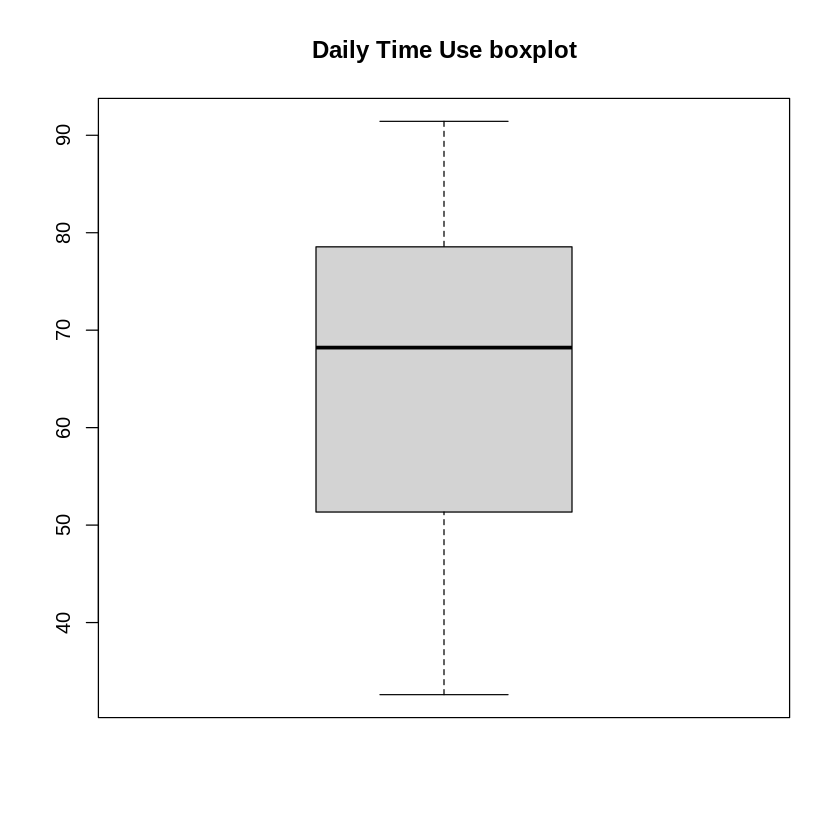

In [ ]:
#Checking for outliers in our numerical columns
boxplot(time, main='Daily Time Use boxplot')

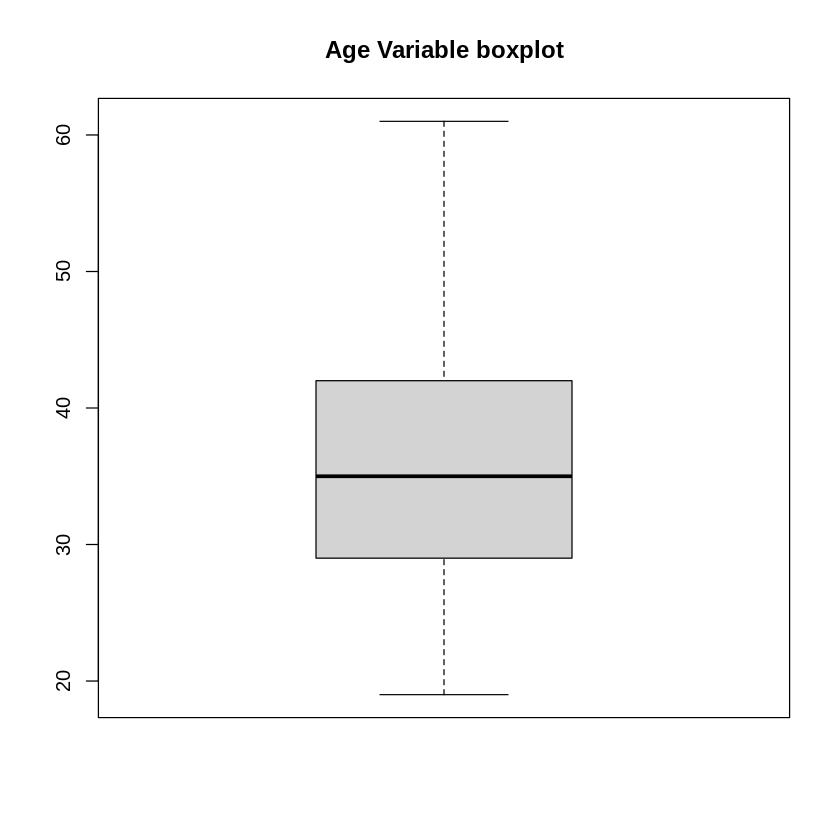

In [ ]:
boxplot(age, main='Age Variable boxplot')

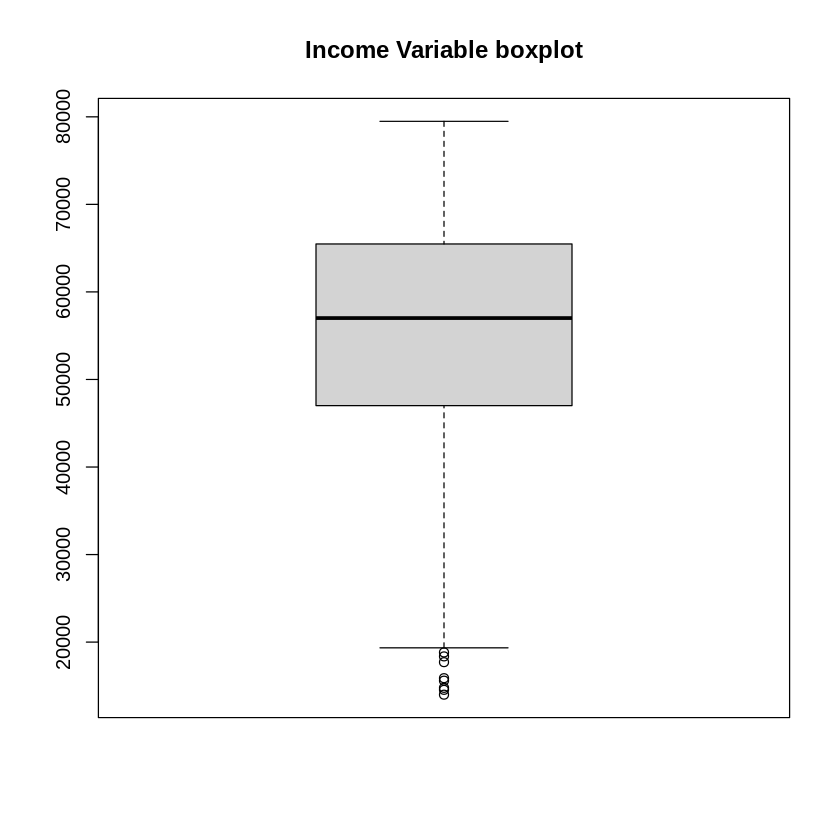

In [ ]:
boxplot(income, main='Income Variable boxplot')

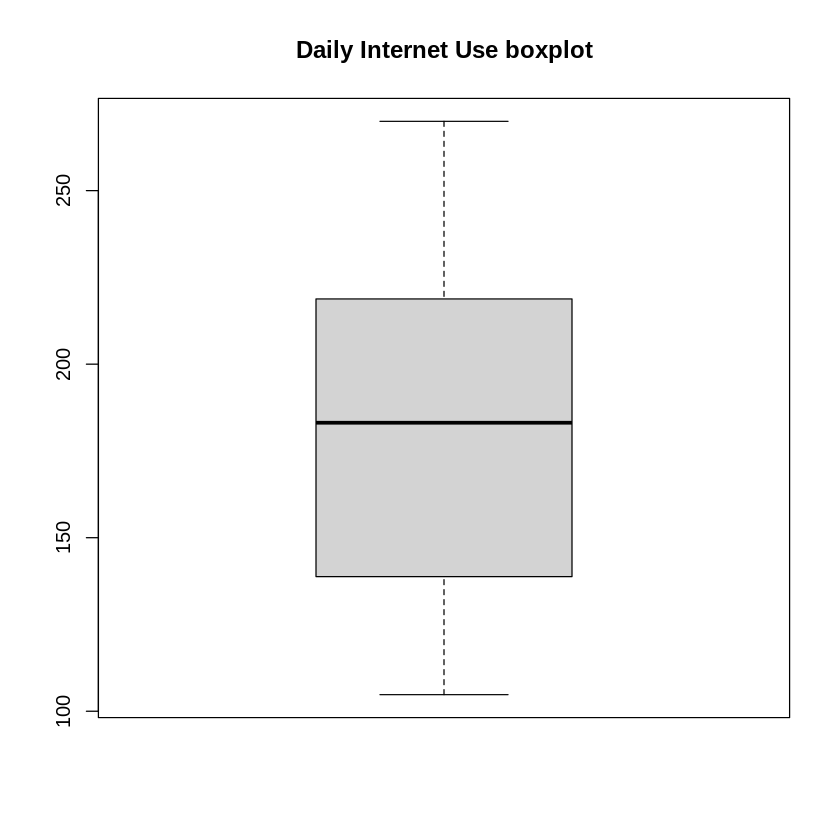

In [ ]:
boxplot(internet, main='Daily Internet Use boxplot')

The time, age and daily internet use variables do not have any outliers, however the Income variable does. We shall not remove the outliers as they contain specific information. 



We shall split the timestamp column further for more detailed analysis. 

In [ ]:
#Importing the necessary library 
library(tidyr)

In [ ]:
#SplittingTime stamp column into Year, Month and day.
advertising = separate(advertising, "Timestamp", c("Year", "Month", "Day"), sep = "-")

In [ ]:
#Previewing the first few rows in our data table.
head(advertising)

Daily_time,Age,Area_income,Daily_internet,Ad_topic,City,Gender,Country,Year,Month,Day,Clicked
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,2016,03,27,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,2016,04,04,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,2016,03,13,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,2016,01,10,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,2016,06,03,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,Male,Norway,2016,05,19,0


# 8. Data Exploration

## a) Univariate Analysis

In [ ]:
numeric_cols <- advertising %>% select('Daily_time', 'Age', 'Area_income', 'Daily_internet')
library(data.table)
numeric_cols <- data.table(numeric_cols)

In [ ]:
#checking for the mean
numeric_cols[,lapply(.SD, mean)]

Daily_time,Age,Area_income,Daily_internet
<dbl>,<dbl>,<dbl>,<dbl>
65.0002,36.009,55000,180.0001


In [ ]:
#checking for the median
numeric_cols[,lapply(.SD, median)]

Daily_time,Age,Area_income,Daily_internet
<dbl>,<dbl>,<dbl>,<dbl>
68.215,35,57012.3,183.13


In [ ]:
#checking the mode
getmode <- function(v) {
  uniqv <- unique(v)
  uniqv[which.max(tabulate(match(v, uniqv)))]
}

numeric_cols[,lapply(.SD, getmode)]

Daily_time,Age,Area_income,Daily_internet
<dbl>,<dbl>,<dbl>,<dbl>
62.26,31,61833.9,167.22


In [ ]:
#checking the standard deviation
numeric_cols[,lapply(.SD, sd)]

Daily_time,Age,Area_income,Daily_internet
<dbl>,<dbl>,<dbl>,<dbl>
15.85361,8.785562,13414.63,43.90234


In [ ]:
# checking the variance 
numeric_cols[,lapply(.SD, var)]

Daily_time,Age,Area_income,Daily_internet
<dbl>,<dbl>,<dbl>,<dbl>
251.3371,77.18611,179952406,1927.415


In [ ]:
#checking the quantiles
quantiles <- numeric_cols[,lapply(.SD, quantile)]
quantile_range = list('min',25,50,75,'max')
rownames(quantiles) <- quantile_range
quantiles

,Daily_time,Age,Area_income,Daily_internet
,<dbl>,<dbl>,<dbl>,<dbl>
min,32.6000,19,13996.50,104.7800
25,51.3600,29,47031.80,138.8300
50,68.2150,35,57012.30,183.1300
75,78.5475,42,65470.64,218.7925
max,91.4300,61,79484.80,269.9600


In [ ]:
#Installing fBasics
install.packages("fBasics", dependencies=TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘timeDate’, ‘timeSeries’, ‘gss’, ‘stabledist’, ‘akima’, ‘RUnit’




In [ ]:
library('fBasics')

Loading required package: timeDate

Loading required package: timeSeries



In [ ]:
#checking the skweness
numeric_cols[,lapply(.SD, skewness)]

Daily_time,Age,Area_income,Daily_internet
<dbl>,<dbl>,<dbl>,<dbl>
-0.370646,0.4777052,-0.6484229,-0.03343681


In [ ]:
#checking the kurtosis
numeric_cols[,lapply(.SD, kurtosis)]

Daily_time,Age,Area_income,Daily_internet
<dbl>,<dbl>,<dbl>,<dbl>
-1.099864,-0.4097066,-0.1110924,-1.275752


In [ ]:
# get frequency table of country column
country_frequency <- sort(table(advertising$Country), decreasing=T) # sorting to identify 

data.frame(head(country_frequency))

Var1,Freq
<fct>,<int>
Czech Republic,9
France,9
Afghanistan,8
Australia,8
Cyprus,8
Greece,8


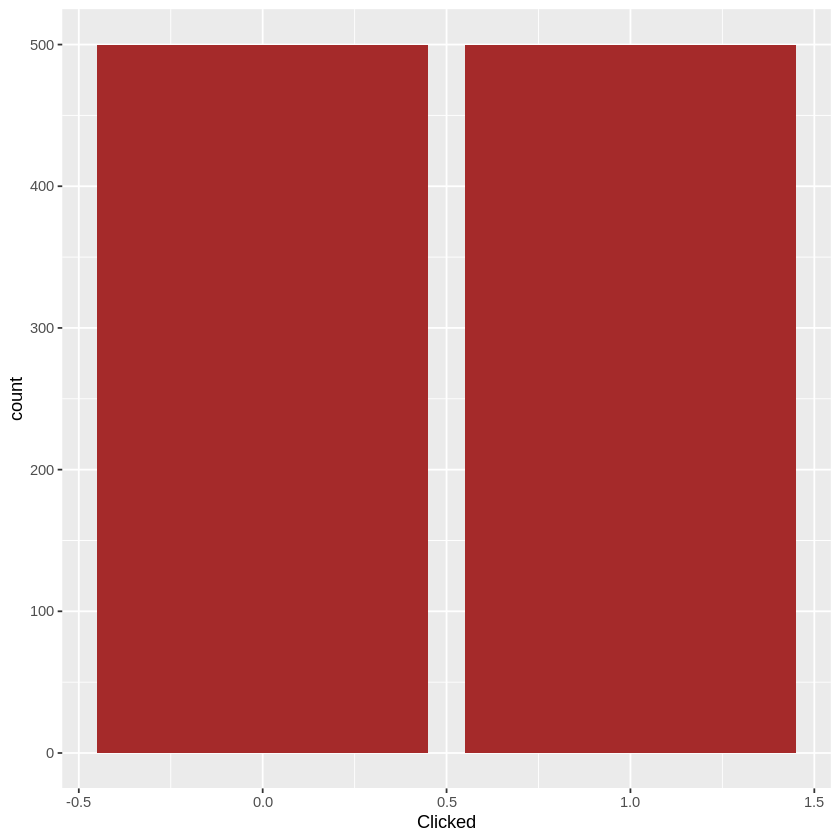

In [ ]:
#Visualzing the number of clicked ads and no clicked ads in our dataset.
ggplot(advertising, aes(Clicked)) + 
  geom_bar(fill = "brown")

The dataset is balanced with the number of clicked on ads being the same as those that were not. 

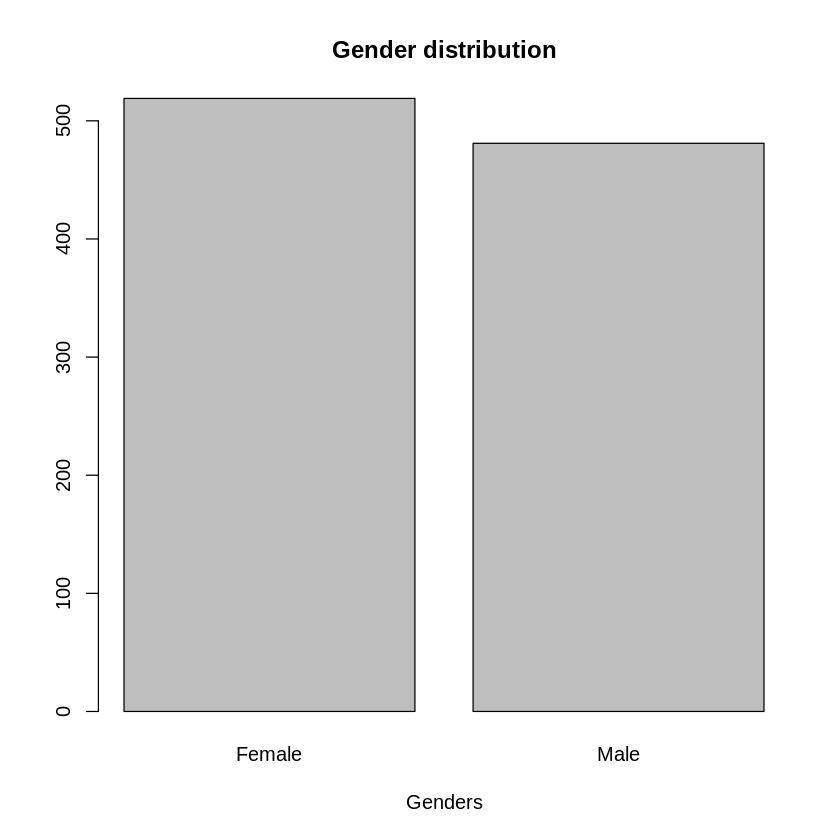

In [ ]:
# check gender count distribution
barplot(table(advertising$Gender), main='Gender distribution', xlab='Genders')

We can see that more females than males were sampled in the study.

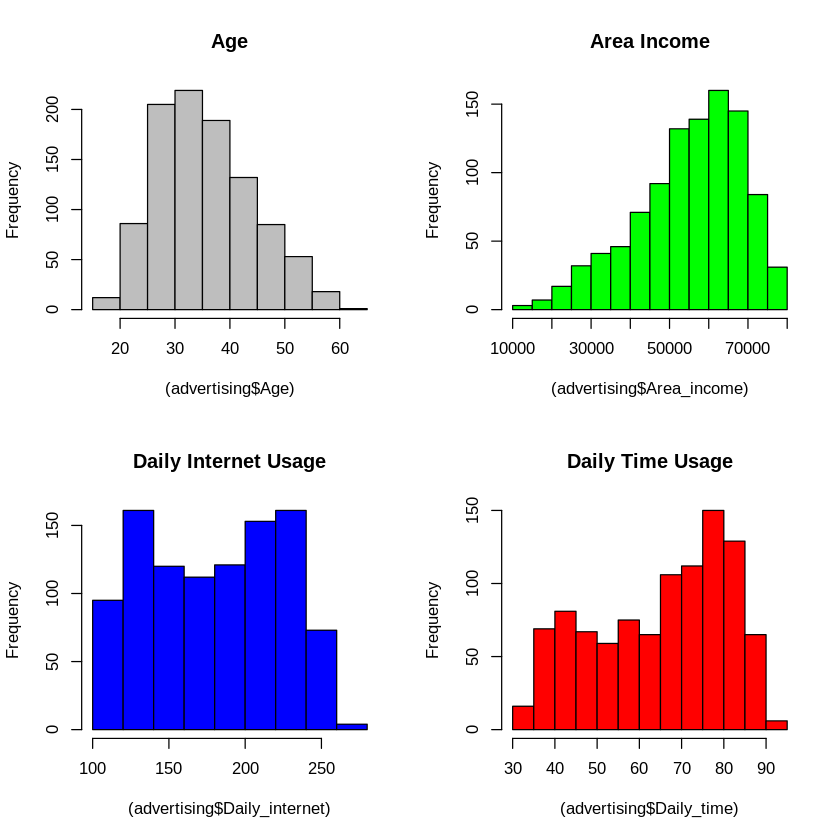

In [ ]:
par(mfrow=c(2,2))

hist((advertising$Age), col='grey', main='Age')
hist((advertising$Area_income), col='green', main='Area Income')
hist((advertising$Daily_internet), col='blue', main='Daily Internet Usage')
hist((advertising$Daily_time), col='red', main='Daily Time Usage')

The area income variable is negatively skewed while the advertising variable is positively skewed. The daily time avariable is slightly positively skewed while daily internet usage is bimodal. 

## b) Bivariate Analysis

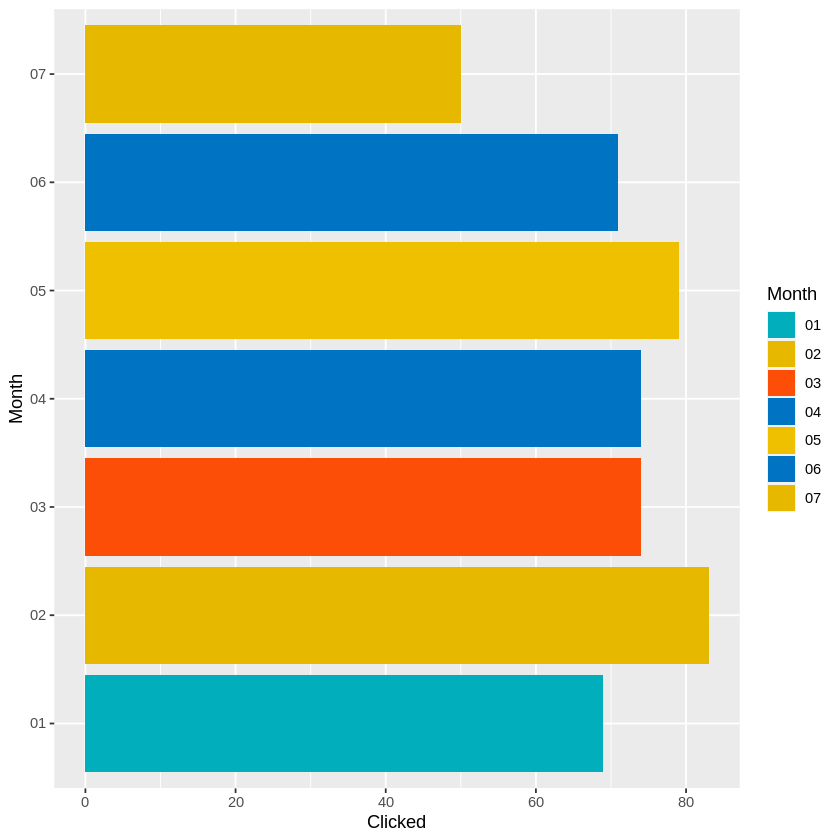

In [ ]:
#checking for the months that had the most activity per month
a <- ggplot(advertising, aes(x = `Clicked`, y = `Month`))

a + geom_col(aes(fill = `Month`)) +
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07","#0073C2FF", "#EFC000FF","#0073C2FF","#E7B800"))

From this visualisation we can see that


*   February and May had the most clicked ads.
*   July had the least clicked ads. 
*   March and April had almost the same clicked ads.



In [ ]:
#Grouping by the days that had the most clicked ads
day <- advertising %>% 
  group_by(Day) %>%
  summarise(n=sum(Clicked, na.rm=TRUE)) %>%
  arrange(desc(n))%>%
  head(10)

`summarise()` ungrouping output (override with `.groups` argument)



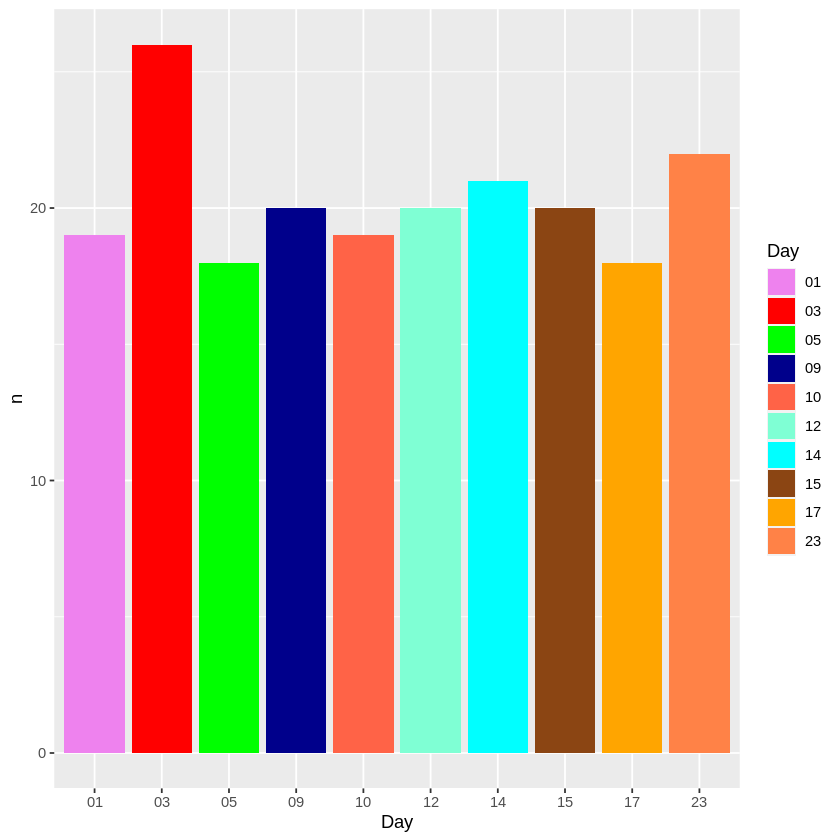

In [ ]:
#Visualizing the days with the most clicked ads.
z <- ggplot(day, aes(x = `Day`, y = n))

z + geom_col(aes(fill = `Day`)) +
  scale_fill_manual(values = c("violet", "red","green","darkblue","tomato","aquamarine","cyan","chocolate4","orange","sienna1"))

The following days experienced the most clicked ads:


*   The 3rd day of the month
*   The 23rd Day of the month
*   The 14th day of the month
*   The 9th day of the month.
*   The 12th day of the month.



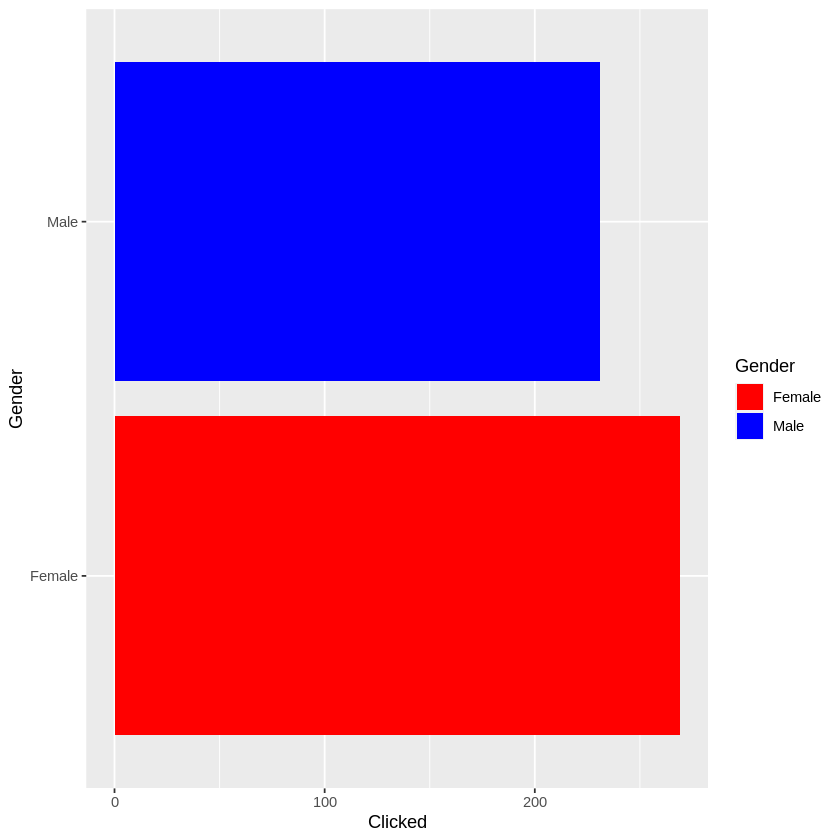

In [ ]:
#Dchecking which gender is most likely to click on the ads.
b <- ggplot(advertising, aes(x = `Clicked`, y = `Gender`))

b + geom_col(aes(fill = `Gender`)) +
  scale_fill_manual(values = c('red', 'blue'))

Females were most likely to click the ads compared to Males. 

In [ ]:
#Grouping the Gender by the Daily Time Spent on the Site
time_spent <- advertising%>% 
  group_by(Gender) %>%
  summarise(n=sum(Daily_time, na.rm=TRUE))

`summarise()` ungrouping output (override with `.groups` argument)



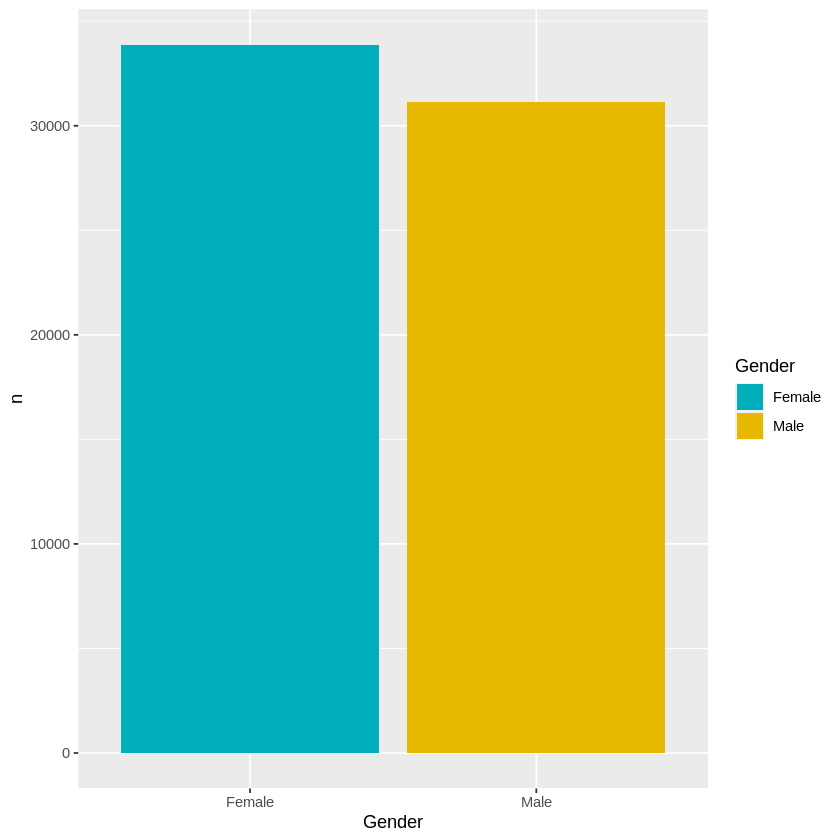

In [ ]:
#Plotting the the two groups.
e <- ggplot(time_spent, aes(x = `Gender`, y = n))

e + geom_col(aes(fill = `Gender`)) +
  scale_fill_manual(values = c("#00AFBB", "#E7B800"))

Females spent more time daily on the Site more than the males.

In [ ]:
#Grouping the Country by the Daily Time spent on site.
country <- advertising %>% 
  group_by(Country) %>%
  summarise(n=sum(Daily_time, na.rm=TRUE)) %>%
  arrange(desc(n))%>%
  head(10)

`summarise()` ungrouping output (override with `.groups` argument)



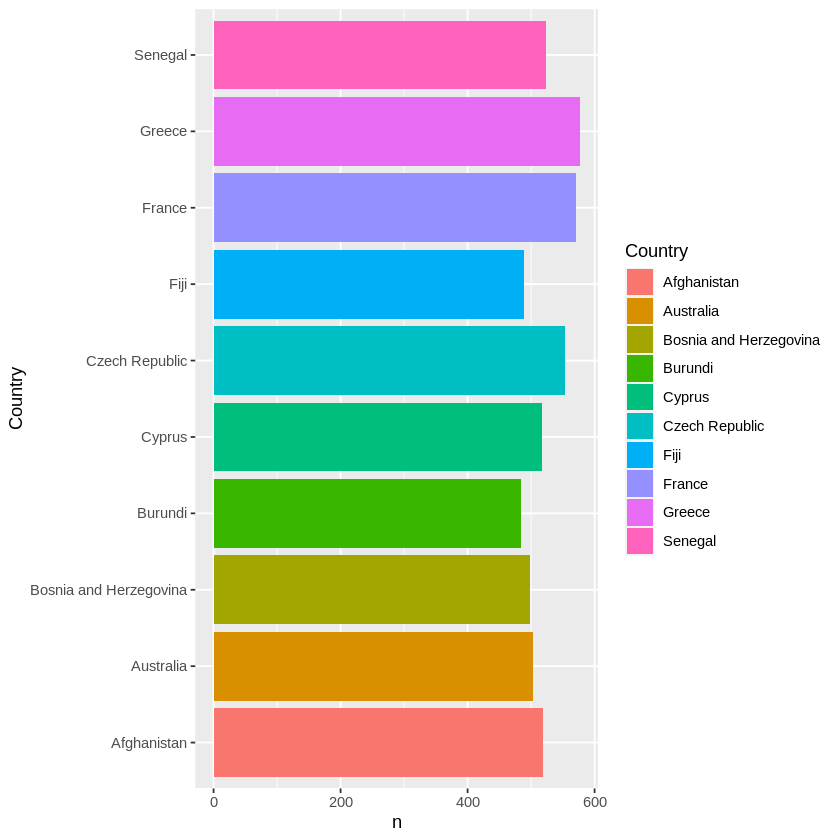

In [ ]:
#Viewing the countries with the spending the most time on the site.
f <- ggplot(country, aes(x = n, y = `Country`))

f + geom_col(aes(fill = `Country`)) 

These are the five countries which spend the most time on the site

*   Greece
*   France
*   Czech Republic
*   Senegal
*   Afghanistan





In [ ]:
#Grouping the Daily time spent on site by the cities.
city <- advertising %>% 
  group_by(City) %>%
  summarise(n=sum(Daily_time, na.rm=TRUE)) %>%
  arrange(desc(n))%>%
  head(10)

`summarise()` ungrouping output (override with `.groups` argument)



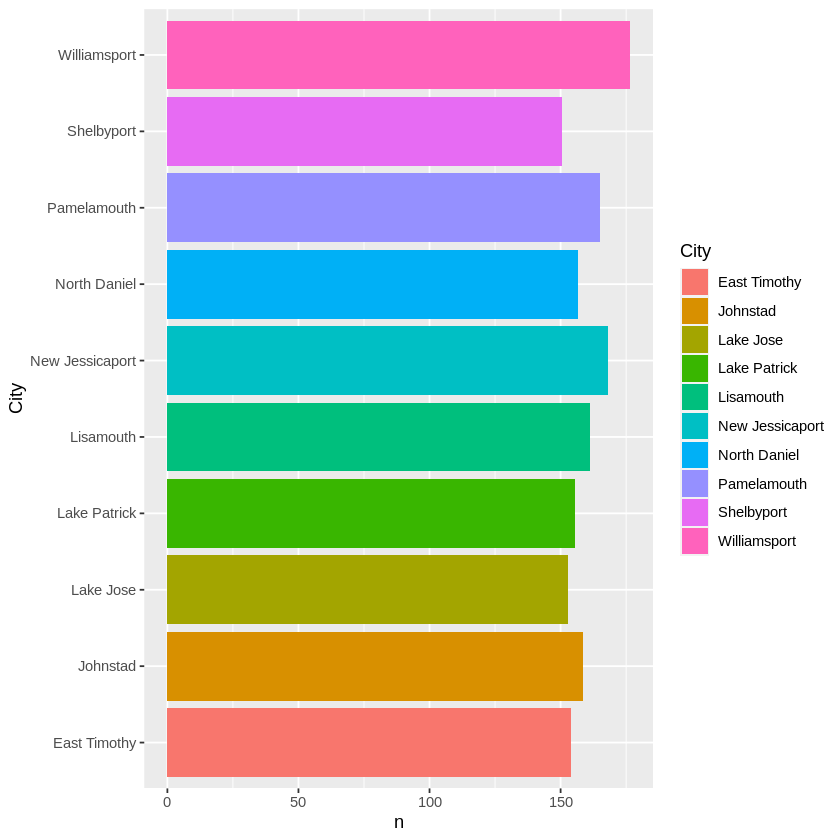

In [ ]:
#Viewing the highest daily time spent on the site in the countries.
g <- ggplot(city, aes(x = n, y = `City`))

g + geom_col(aes(fill = `City`)) 

The following cities spend the most time on the site:


*   Williamsport
*   New Jessicaport
*   Pamelamouth
*   Lisamouth
*   Johnstad



In [ ]:
#Grouping Number of Clicks in a country 
country_ad <- advertising %>% 
  group_by(Country) %>%
  summarise(n=sum(Clicked, na.rm=TRUE)) %>%
  arrange(desc(n))%>%
  head(10)

`summarise()` ungrouping output (override with `.groups` argument)



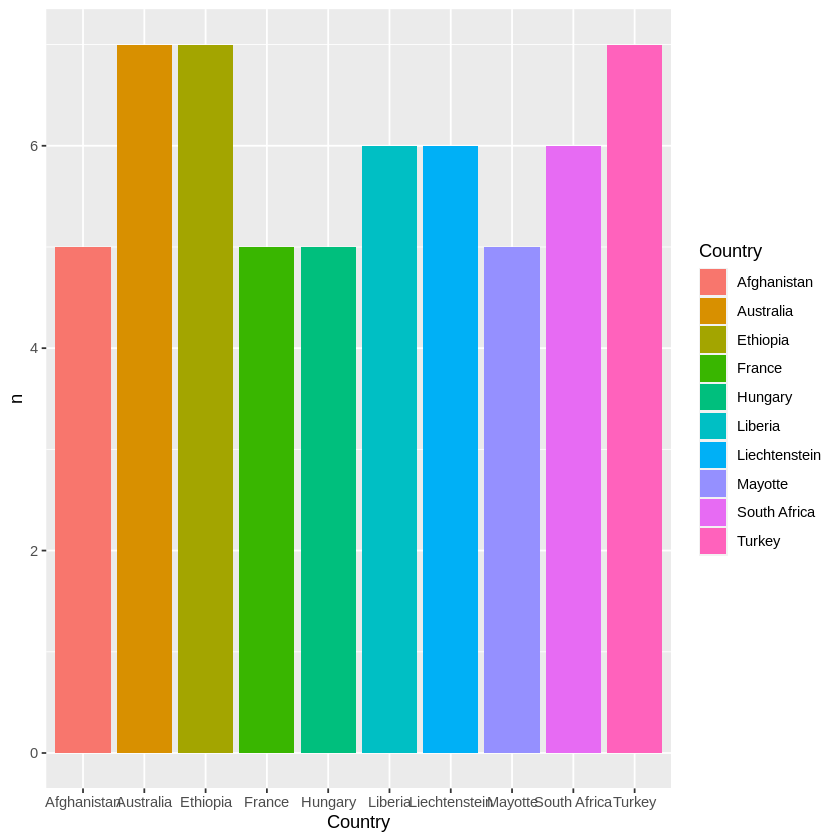

In [ ]:
#Visualizing the clicks in a country.
i <- ggplot(country_ad, aes(x = `Country`, y = n))

i + geom_col(aes(fill = `Country`)) 

The countries that had the highest click through are:


*   Autralia, Ethiopia and Turkey had the highest clicks of her ads.
*   Liechtenstein and South Africa followed as well.



In [ ]:
# assign numeric columns to variables
daily_internet <- advertising$Daily_internet
area_income <- advertising$Area_income
daily_time <- advertising$Daily_time
age <- advertising$Age

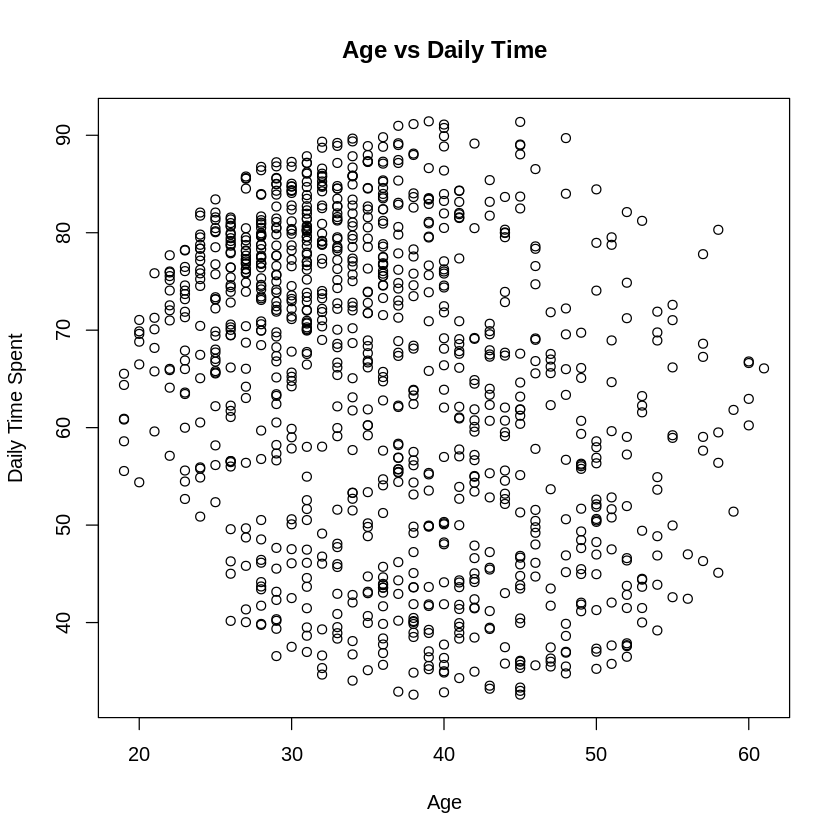

In [ ]:
plot(age, daily_time, xlab='Age', ylab='Daily Time Spent', main='Age vs Daily Time')

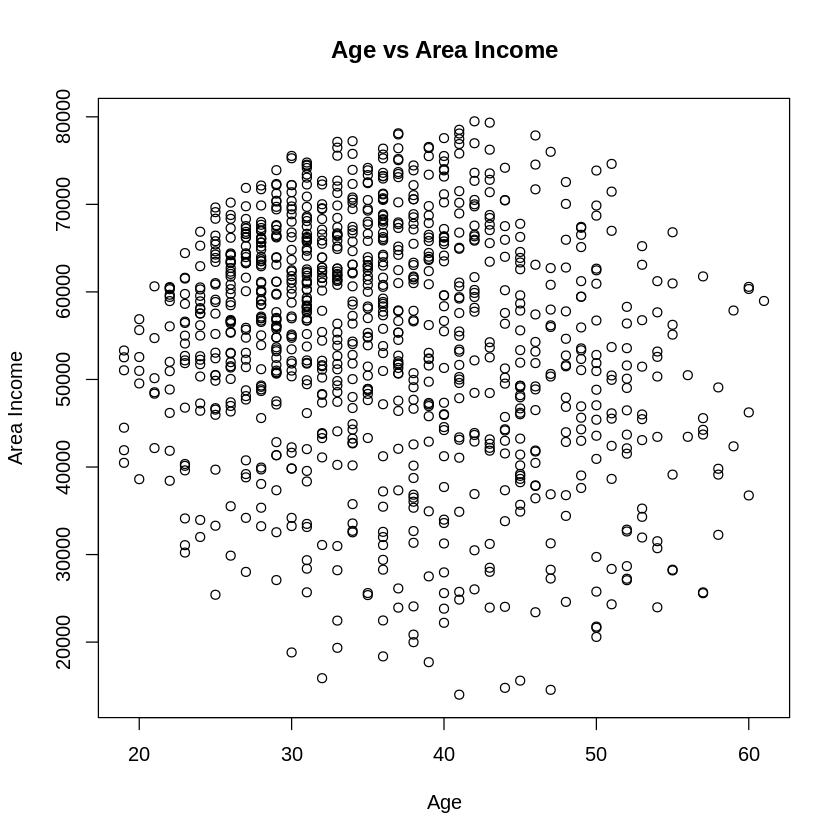

In [ ]:
plot(age, area_income, xlab='Age', ylab='Area Income', main='Age vs Area Income')

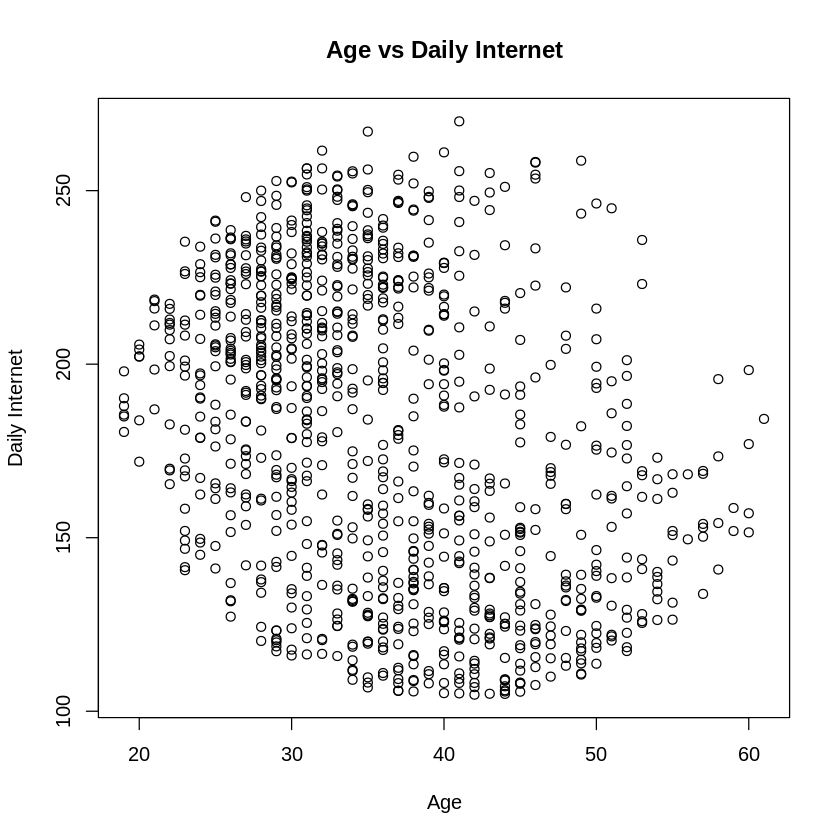

In [ ]:
plot(age, daily_internet, xlab='Age', ylab='Daily Internet', main='Age vs Daily Internet')

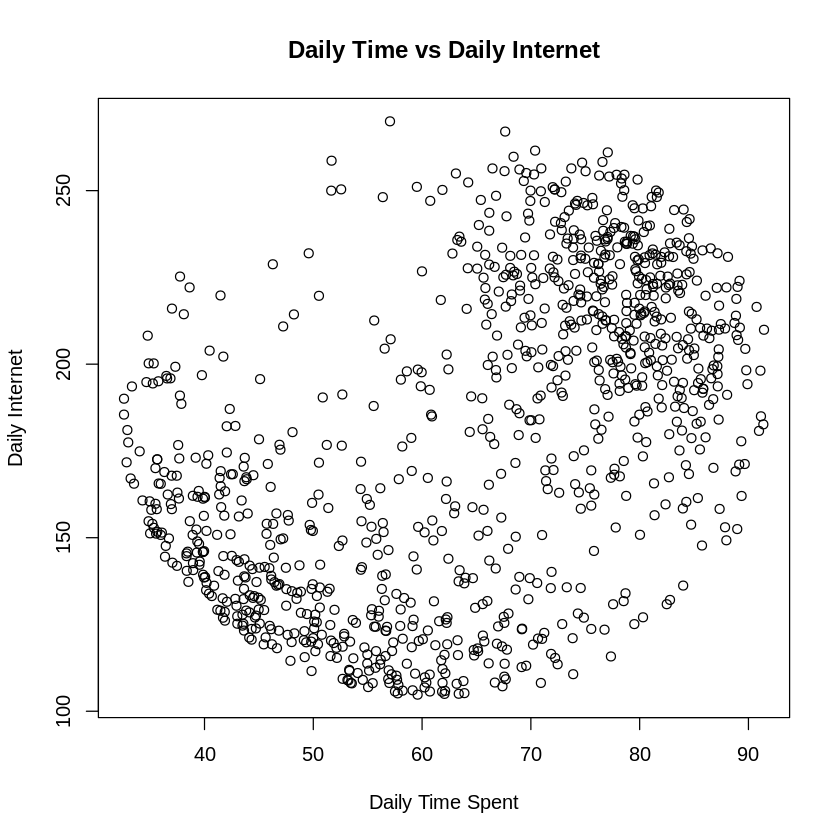

In [ ]:
plot(daily_time, daily_internet, xlab='Daily Time Spent', ylab='Daily Internet', main='Daily Time vs Daily Internet')

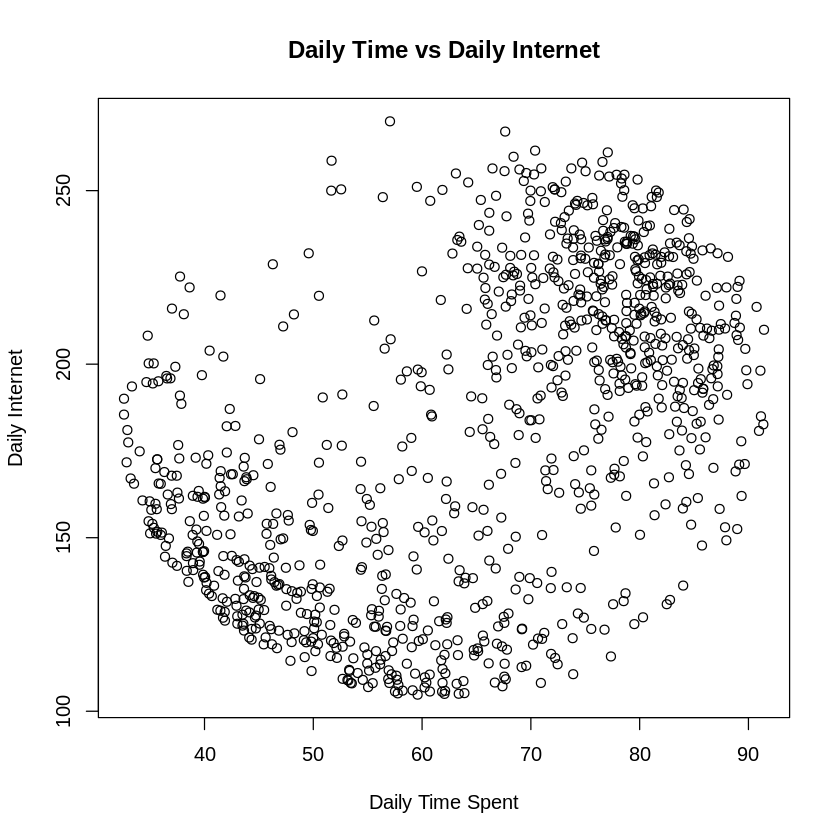

In [ ]:
plot(daily_time, daily_internet, xlab='Daily Time Spent', ylab='Daily Internet', main='Daily Time vs Daily Internet')

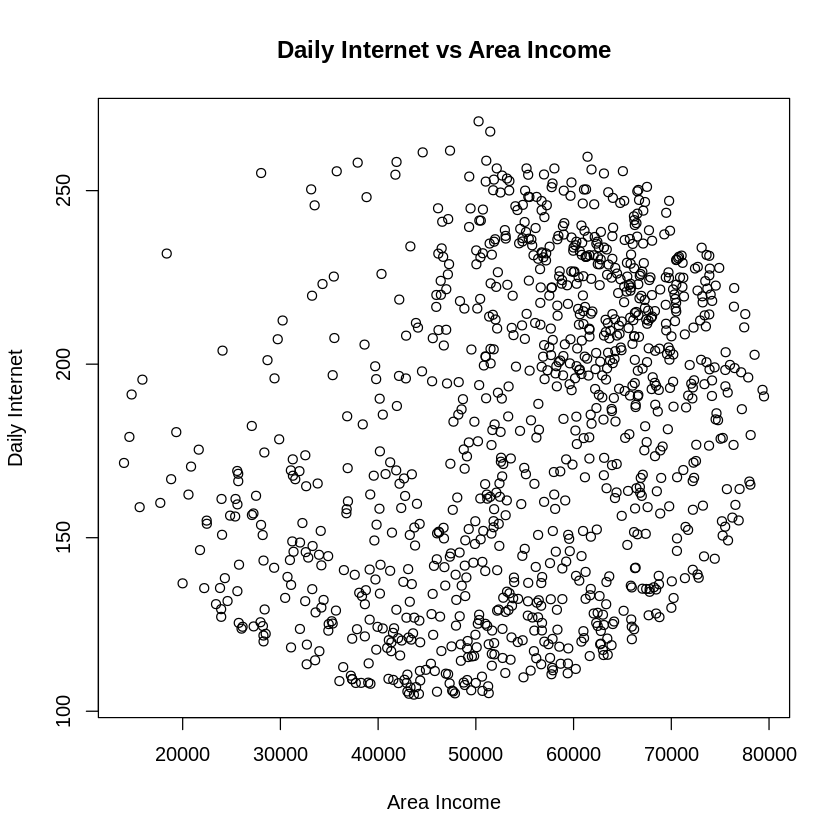

In [ ]:
plot(area_income, daily_internet, xlab='Area Income', ylab='Daily Internet', main='Daily Internet vs Area Income')

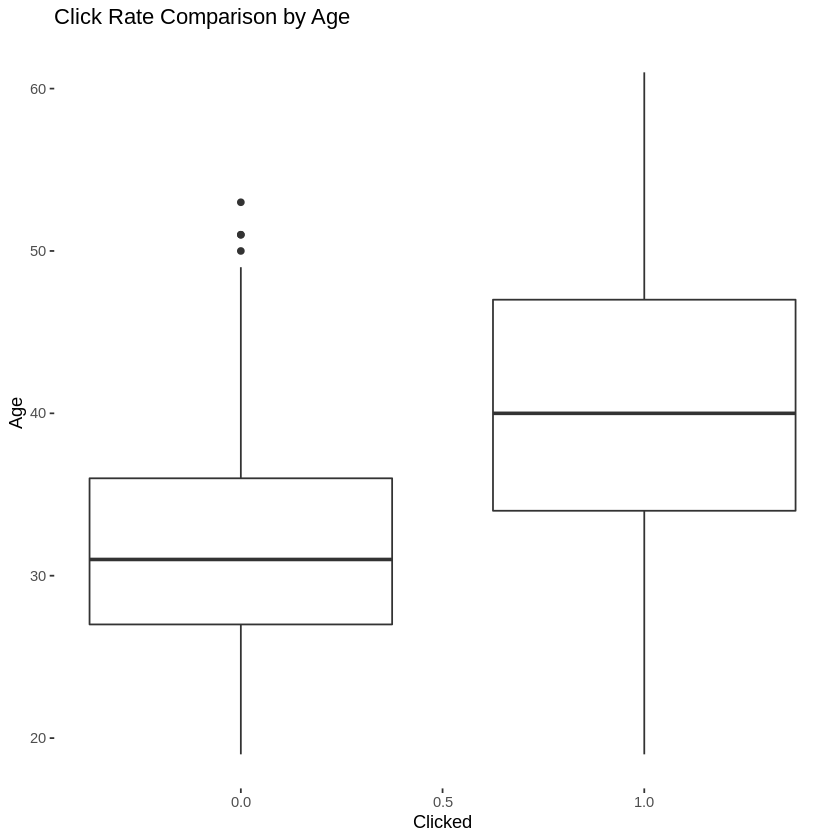

In [ ]:
# compare mean and dispersion of age of individuals who clicked the ad vs those who did not click
ggplot(data = advertising,
  aes(x = Clicked, y = Age, group = Clicked)) +
  geom_boxplot() +
  labs(title = "Click Rate Comparison by Age") +
  theme(panel.background = element_rect(fill = "white"))

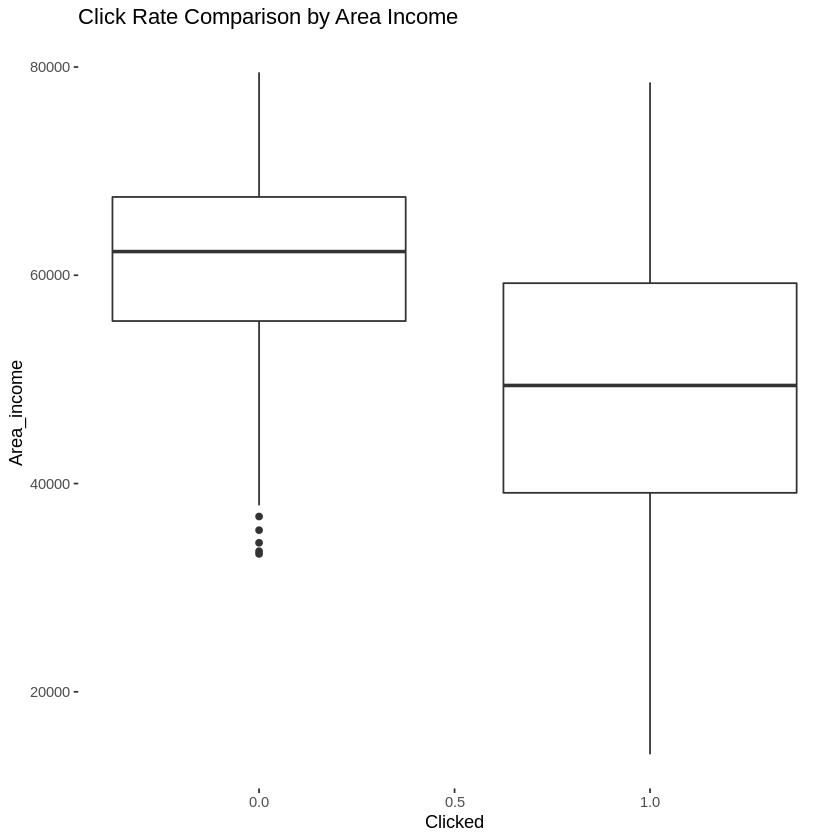

In [ ]:
# compare mean and dispersion of area income of individuals who clicked the ad vs those who did not click
ggplot(data = advertising,
  aes(x = Clicked, y = Area_income, group = Clicked)) +
  geom_boxplot() +
  labs(title = "Click Rate Comparison by Area Income") +
  theme(panel.background = element_rect(fill = "white"))

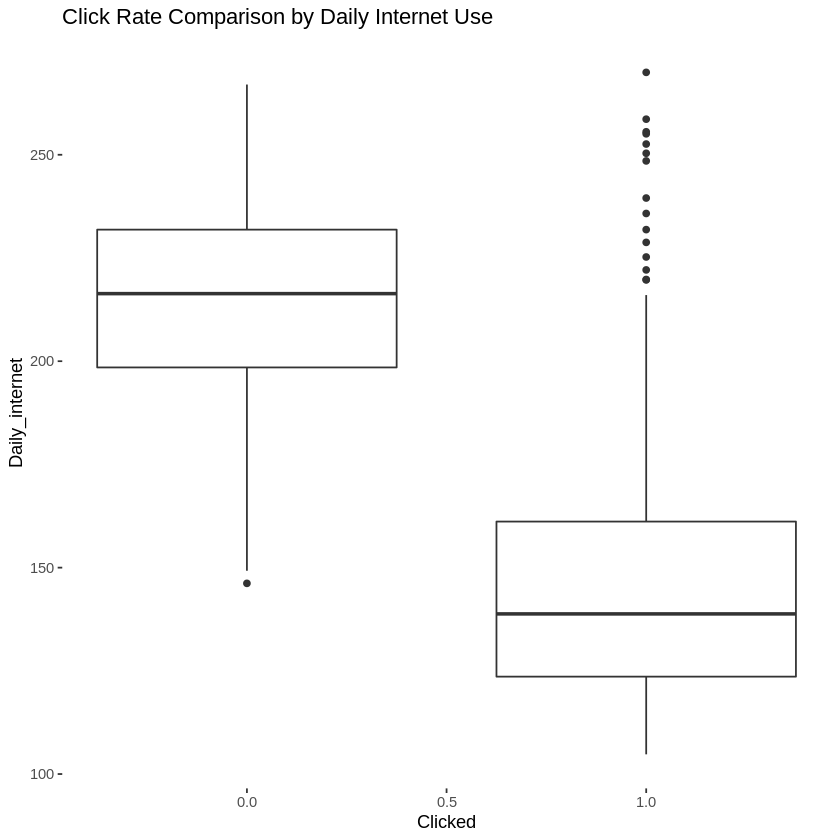

In [ ]:
# compare mean and dispersion of daily internet use of individuals who clicked the ad vs those who did not click
ggplot(data = advertising,
  aes(x = Clicked, y = Daily_internet, group = Clicked)) +
  geom_boxplot() +
  labs(title = "Click Rate Comparison by Daily Internet Use") +
  theme(panel.background = element_rect(fill = "white"))

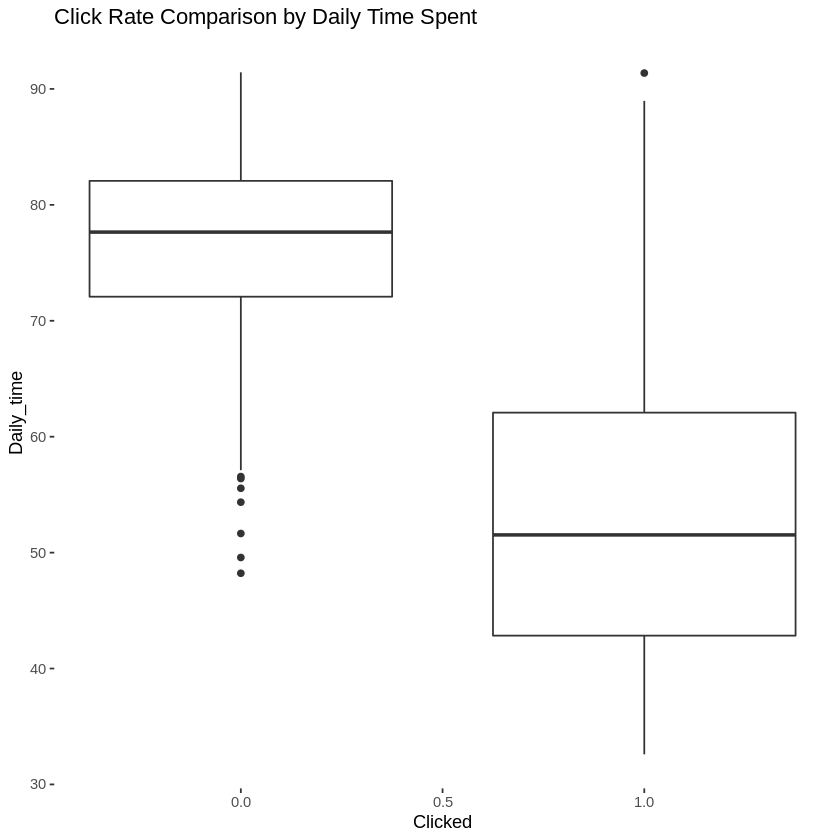

In [ ]:
# compare mean and dispersion of daily time spent of individuals who clicked the ad vs those who did not click
ggplot(data = advertising,
  aes(x = Clicked, y = Daily_time, group = Clicked)) +
  geom_boxplot() +
  labs(title = "Click Rate Comparison by Daily Time Spent") +
  theme(panel.background = element_rect(fill = "white"))

In [ ]:
#Subsetting numerical columns in the datatable
numerical_cols <- (colnames(advertising) == 'Daily_time' | colnames(advertising) == 'Age' | colnames(advertising) == 'Area_income' | colnames(advertising) == 'Daily_internet' | colnames(advertising) == 'Clicked')


In [ ]:
#Finding correlations in our numerical columns.
cor(numeric_cols)

,Daily_time,Age,Area_income,Daily_internet
Daily_time,1.0000000,-0.3315133,0.3109544,0.5186585
Age,-0.3315133,1.0000000,-0.1826050,-0.3672086
Area_income,0.3109544,-0.1826050,1.0000000,0.3374955
Daily_internet,0.5186585,-0.3672086,0.3374955,1.0000000


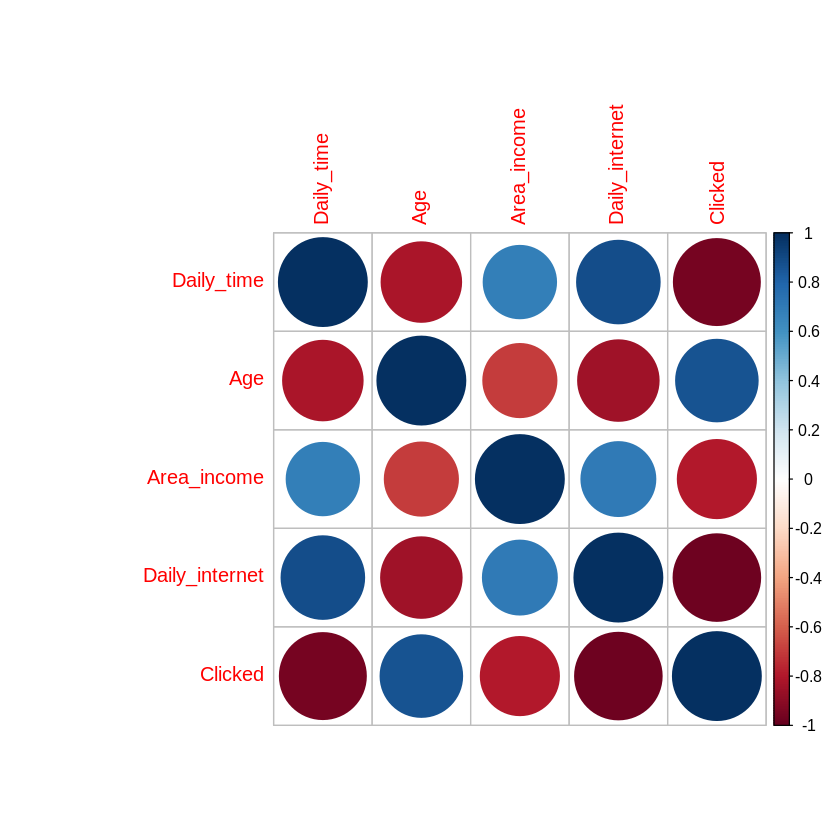

In [ ]:
library(corrplot)

#select appropriate columns
selected_cols <- round(cor(select_if(advertising, is.numeric)), 2)
mydata.cor = cor(selected_cols)

corrplot(mydata.cor) # plot correlation matrix

We can see the following from the above analysis:
- there is weak negative correlation between age and daily time, age and area income, age and daily internet. 
- there is positive correlation betwwen daily internt time and usage, weak positive correlation between area income and daily internet time
- most of the people that clicked on the ad were older at about 40 years while those that did not were about 32 years. 
- most of the people that clicked had lower incomes of about 55000 while those that did not click avergaed about 62000. Those that clicked also spent less than 160 megabyes on internet compared to those that did not. 
- those that spent less time on the site are also more likely to click that thosw who spend time on the site. 

In [ ]:
#Installing fBasics
install.packages("fBasics", dependencies=TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# 9. Implementing the Solution








In [ ]:
# make a copy of the datframe
sol <- cbind(data)
dim(sol)

[1] 1000    6

In [ ]:
print(names(data))

[1] "Daily_time"     "Age"            "Area_income"    "Daily_internet"
[5] "Gender"         "Clicked"       


In [ ]:
# first we split the data set into training and test sets
# set seed
set.seed(0)

# select data
library(caret)
library(lattice)
intrain <- createDataPartition(y = sol$Clicked, p= 0.8, list = FALSE)
train <- sol[intrain,]
test <- sol[-intrain,]

In [ ]:
# check the dimensions of the train and test 
dim(train); 
dim(test);

[1] 800   6

[1] 200   6

In [109]:
install.packages("e1071")
require(e1071)

install.packages("kernlab")
require(kernlab)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: e1071


Attaching package: ‘e1071’


The following objects are masked from ‘package:timeDate’:

    kurtosis, skewness


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: kernlab


Attaching package: ‘kernlab’


The following object is masked from ‘package:purrr’:

    cross


The following object is masked from ‘package:ggplot2’:

    alpha




In [110]:
train$Clicked = factor(train$Clicked)

In [111]:
# Train the model using support vector machine
trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)
Linear_model <- train(Clicked ~., data=train, method='svmLinear', trControl=trctrl, preProcess = c("center", "scale"), tuneLength = 10)
Linear_model

Support Vector Machines with Linear Kernel 

800 samples
  5 predictor
  2 classes: '0', '1' 

Pre-processing: centered (5), scaled (5) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 720, 720, 720, 720, 720, 720, ... 
Resampling results:

  Accuracy   Kappa    
  0.9716667  0.9433333

Tuning parameter 'C' was held constant at a value of 1

In [112]:
# we now need to make a prediction using the trained model and the test data
test_pred <- predict(Linear_model, newdata = test)
test_pred

[1] 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0
 [38] 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0
 [75] 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0
[112] 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0
[149] 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1
[186] 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1
Levels: 0 1

In [113]:
# Train the model using support vector machine Radial method
trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)
Radial_model <- train(Clicked ~., data=train, method='svmRadial', trControl=trctrl, preProcess = c("center", "scale"), tuneLength = 10)
Radial_model

Support Vector Machines with Radial Basis Function Kernel 

800 samples
  5 predictor
  2 classes: '0', '1' 

Pre-processing: centered (5), scaled (5) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 720, 720, 720, 720, 720, 720, ... 
Resampling results across tuning parameters:

  C       Accuracy   Kappa    
    0.25  0.9670833  0.9341667
    0.50  0.9662500  0.9325000
    1.00  0.9658333  0.9316667
    2.00  0.9616667  0.9233333
    4.00  0.9600000  0.9200000
    8.00  0.9595833  0.9191667
   16.00  0.9591667  0.9183333
   32.00  0.9587500  0.9175000
   64.00  0.9587500  0.9175000
  128.00  0.9545833  0.9091667

Tuning parameter 'sigma' was held constant at a value of 0.2460916
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.2460916 and C = 0.25.

In [114]:
# we now need to make a prediction using the trained model and the test data
test_pred <- predict(Radial_model, newdata = test)
test_pred

[1] 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0
 [38] 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0
 [75] 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0
[112] 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0
[149] 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1
[186] 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1
Levels: 0 1

In [115]:
#we use random forest to challenge the solution
install.packages("randomForest")
require(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: randomForest

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:timeSeries’:

    outlier


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [116]:
# random forest
model_rf = train(Clicked ~ ., data=train, method='rf', tuneLength=5, trControl = trctrl)
model_rf

note: only 4 unique complexity parameters in default grid. Truncating the grid to 4 .



Random Forest 

800 samples
  5 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 720, 720, 720, 720, 720, 720, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.9650000  0.9300000
  3     0.9633333  0.9266667
  4     0.9625000  0.9250000
  5     0.9616667  0.9233333

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

In [117]:
# Split into Train and Validation sets
# Training Set : Validation Set = 70 : 30 (random)
set.seed(100)
train <- sample(nrow(data), 0.7*nrow(data), replace = FALSE)
TrainSet <- data[train,]
ValidSet <- data[-train,]
summary(TrainSet)
summary(ValidSet)

   Daily_time         Age         Area_income    Daily_internet 
 Min.   :32.60   Min.   :19.00   Min.   :13996   Min.   :104.8  
 1st Qu.:50.85   1st Qu.:29.00   1st Qu.:47495   1st Qu.:140.0  
 Median :67.57   Median :35.00   Median :57425   Median :182.7  
 Mean   :64.63   Mean   :36.13   Mean   :55291   Mean   :180.2  
 3rd Qu.:78.31   3rd Qu.:42.00   3rd Qu.:65840   3rd Qu.:219.1  
 Max.   :91.37   Max.   :60.00   Max.   :79332   Max.   :270.0  
     Gender         Clicked      
 Min.   :1.000   Min.   :0.0000  
 1st Qu.:1.000   1st Qu.:0.0000  
 Median :1.000   Median :1.0000  
 Mean   :1.486   Mean   :0.5043  
 3rd Qu.:2.000   3rd Qu.:1.0000  
 Max.   :2.000   Max.   :1.0000  

   Daily_time         Age         Area_income    Daily_internet      Gender    
 Min.   :32.84   Min.   :19.00   Min.   :18819   Min.   :105.0   Min.   :1.00  
 1st Qu.:52.02   1st Qu.:29.00   1st Qu.:44444   1st Qu.:135.5   1st Qu.:1.00  
 Median :70.25   Median :34.00   Median :56838   Median :183.6   Median :1.00  
 Mean   :65.86   Mean   :35.73   Mean   :54321   Mean   :179.5   Mean   :1.47  
 3rd Qu.:78.69   3rd Qu.:42.00   3rd Qu.:64047   3rd Qu.:217.3   3rd Qu.:2.00  
 Max.   :91.43   Max.   :61.00   Max.   :79485   Max.   :261.0   Max.   :2.00  
    Clicked    
 Min.   :0.00  
 1st Qu.:0.00  
 Median :0.00  
 Mean   :0.49  
 3rd Qu.:1.00  
 Max.   :1.00  

In [119]:
#Factorizing the class label to a TRue or False
data$Clicked <- factor(data$Clicked, levels = c(0,1), labels = c("False", "True"))

In [122]:
# Create a Random Forest model with default parameters
model1 <- randomForest(y = data$Clicked, x = data[,c("Daily_time","Age","Area_income","Daily_internet","Gender")], keep.forest=FALSE, importance = TRUE,type="Class")
model1



Call:
 randomForest(x = data[, c("Daily_time", "Age", "Area_income",      "Daily_internet", "Gender")], y = data$Clicked, importance = TRUE,      keep.forest = FALSE, type = "Class") 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 3.8%
Confusion matrix:
      False True class.error
False   482   18       0.036
True     20  480       0.040

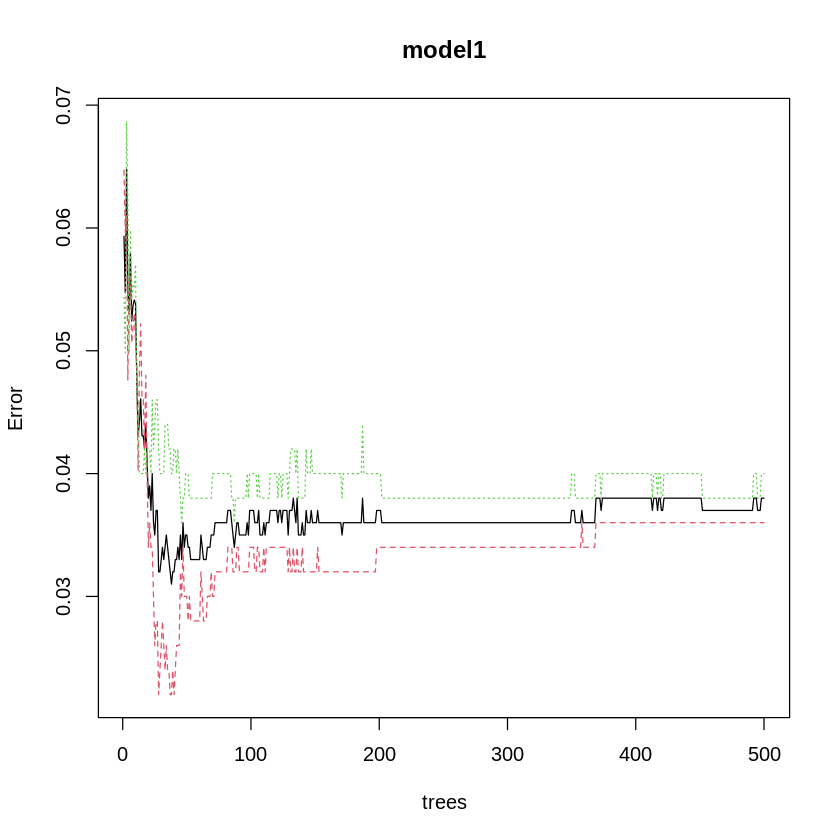

In [123]:
#Viewing the error rate in the model.
plot(model1)

The fewer the number of trees the more the errors.

In [125]:
#Installing ranger and loading in our notebook.
install.packages("ranger",dependencies = TRUE)
library("ranger")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’



Attaching package: ‘ranger’


The following object is masked from ‘package:randomForest’:

    importance




In [126]:
#Training our model
model <- train(Clicked ~ .,
               data = data,
               method = "ranger",
               tuneLength = 5)

note: only 4 unique complexity parameters in default grid. Truncating the grid to 4 .



In [127]:
#Hyperparameter tuning of our model. Uing both the gini and extratrees as splitrules
set.seed(42)
myGrid <- expand.grid(mtry = c(5, 10, 20, 40, 60),
                     splitrule = c("gini", "extratrees"),
                     min.node.size = 10)
model <- train(Clicked ~ .,
               data = data,
               method = "ranger", 
               tuneGrid = myGrid,
               trControl = trainControl(method = "cv",
                                       number = 5,
                                       verboseIter = FALSE))

Warning message:
“model fit failed for Fold1: mtry=10, splitrule=gini, min.node.size=10 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  User interrupt or internal error.
”
Warning message:
“model fit failed for Fold1: mtry=20, splitrule=gini, min.node.size=10 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  User interrupt or internal error.
”
Warning message:
“model fit failed for Fold1: mtry=40, splitrule=gini, min.node.size=10 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  User interrupt or internal error.
”
Warning message:
“model fit failed for Fold1: mtry=60, splitrule=gini, min.node.size=10 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  User interrupt or internal error.
”
Warning message:
“model fit failed for Fold1: mtry=10, splitrule=extratrees, min.node.size=10 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  User interrupt or in

In [128]:
model

Random Forest 

1000 samples
   5 predictor
   2 classes: 'False', 'True' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 800, 800, 800, 800, 800 
Resampling results across tuning parameters:

  mtry  splitrule   Accuracy  Kappa
   5    gini        0.960     0.920
   5    extratrees  0.961     0.922
  10    gini          NaN       NaN
  10    extratrees    NaN       NaN
  20    gini          NaN       NaN
  20    extratrees    NaN       NaN
  40    gini          NaN       NaN
  40    extratrees    NaN       NaN
  60    gini          NaN       NaN
  60    extratrees    NaN       NaN

Tuning parameter 'min.node.size' was held constant at a value of 10
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 5, splitrule = extratrees
 and min.node.size = 10.

In [131]:
install.packages('rpart')
library(rpart)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [132]:
# Using the rpart library to viualize the true
model2 <- rpart(Clicked ~ ., data = data, cp=0.2)
model2

n= 1000 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 1000 500 False (0.50000000 0.50000000)  
  2) Daily_internet>=177.505 524  61 False (0.88358779 0.11641221) *
  3) Daily_internet< 177.505 476  37 True (0.07773109 0.92226891) *

# 10. Conclusion

From this analysis, we can see that the SVM linear model displays high accuracy scores and is the best model to use. Furthermore, the following are the groups most likely to click on the ads:
- People that spend less time on the internet.
- Low to medium internet users.
- Users above 40 years.  

The daily internet column is also seen as a key determinant in the random forest model.

We recommend that the following considerations be implemented:
- Target most lucrative locations.
- Shorter advertisemnts.
- Tuning the parameters for better results. 
